# Simulating logic gates using `crysx_nn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Import CrysX_nn related stuff

# Import loss functions
from crysx_nn.loss import MSE_loss, MSE_loss_grad
from crysx_nn.loss import BCE_loss, BCE_loss_grad
# Import neural network functions
from crysx_nn.network import nn_optimize_fast
from crysx_nn.network import visualize
from crysx_nn.network import forward_feed

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Define some network parameters that we will be using later on

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
eeta = 0.5
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Visualize the network

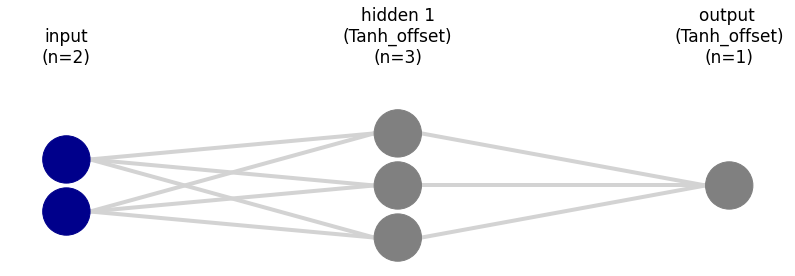

In [3]:
visualize(nInputs, neurons_per_layer, activation_func_names)

## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [4]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [5]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [6]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## Generate initial weights and biases

In [7]:
from crysx_nn.network import init_params
weightsOriginal, biasesOriginal = init_params(nInputs, neurons_per_layer, method='Xavier')
print('Weights matrices: \n', weightsOriginal)
print('Biases: \n', biasesOriginal)

Weights matrices: 
 [array([[ 0.39276426, -0.25235293],
       [-0.42515796, -0.51769354],
       [-0.59837291, -0.69110293]]), array([[-0.08486744, -0.1243066 , -0.15301647]])]
Biases: 
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [8]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [9]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.21286294924513627


### Visualize the training loss

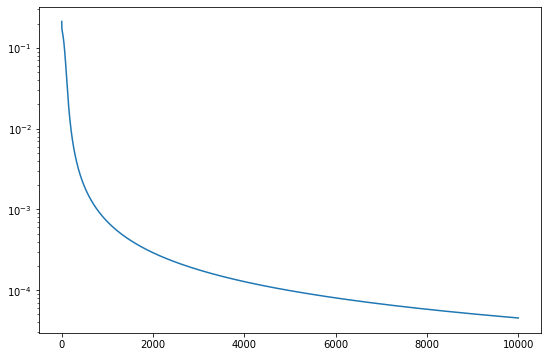

In [10]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [11]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 1.05410543,  0.13608834],
       [-1.44666392, -1.65386251],
       [-1.61849611, -1.80662149]]), array([[ 1.59940328, -3.24496594, -3.65559918]])]
Optimized Biases:  [array([-0.12752225,  2.07931984,  2.34054494]), array([1.61161168])]


### Make predictions using the optimized weights

In [12]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.43658227, 0.9846117 , 0.99081622],
       [0.50428294, 0.70075898, 0.74418724],
       [0.86449844, 0.77993916, 0.8090884 ],
       [0.8933421 , 0.11482123, 0.10255567]]), array([[1.21636580e-04],
       [5.75192808e-03],
       [6.76926083e-03],
       [9.89907961e-01]])]
Inputs at each layer :
  [array([[-0.12752225,  2.07931984,  2.34054494],
       [ 0.00856609,  0.42545733,  0.53392345],
       [ 0.92658318,  0.63265592,  0.72204883],
       [ 1.06267153, -1.02120659, -1.08457266]]), array([[-4.50717558],
       [-2.57622581],
       [-2.49428555],
       [ 2.29293254]])]
New Average Error with optimized weights:
 4.519290347266839e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[1.21636580e-04]
 [5.75192808e-03]
 [6.76926083e-03]
 [9.89907961e-01]]
Expected Output:  [[0.]
 [0.]
 [0.]
 [1.]]


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [13]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputNAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2951065638374939


### Visualize the training loss

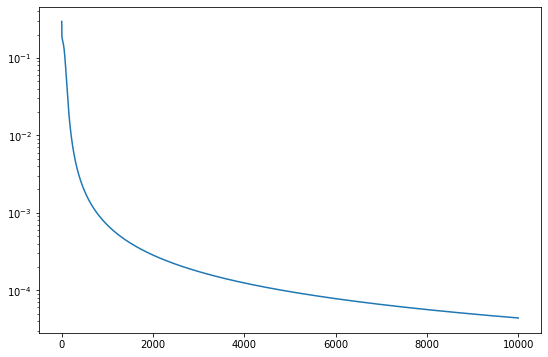

In [14]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [15]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 1.33819254,  0.28627274],
       [-1.3504087 , -1.71399455],
       [-1.43767544, -1.78142678]]), array([[-2.20416109,  3.25211791,  3.42836314]])]
Optimized Biases:  [array([-0.55891131,  2.04358862,  2.17011995]), array([-1.08003003])]


### Make predictions using the optimized weights

In [16]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputNAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputNAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.24641539, 0.98349058, 0.98713428],
       [0.36696084, 0.65907799, 0.68511654],
       [0.82614698, 0.80001047, 0.8122793 ],
       [0.89389014, 0.11490093, 0.10929481]]), array([[0.99995077],
       [0.99455021],
       [0.99311192],
       [0.00991376]])]
Inputs at each layer :
  [array([[-0.55891131,  2.04358862,  2.17011995],
       [-0.27263857,  0.32959407,  0.38869317],
       [ 0.77928123,  0.69317991,  0.73244451],
       [ 1.06555397, -1.02081464, -1.04898227]]), array([[ 4.9595129 ],
       [ 2.60335679],
       [ 2.48552575],
       [-2.3019342 ]])]
New Average Error with optimized weights:
 4.385771422471983e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.99995077]
 [0.99455021]
 [0.99311192]
 [0.00991376]]
Expected Output:  [[1.]
 [1.]
 [1.]
 [0.]]


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [ ]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.26916473273068714


### Visualize the training loss

In [ ]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [ ]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

### Make predictions using the optimized weights

In [ ]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputOR)

## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [ ]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputXOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



### Visualize the training loss

In [ ]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [ ]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

### Make predictions using the optimized weights

In [ ]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputXOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputXOR)